<a href="https://colab.research.google.com/github/mrchapagain/SocialNetworkAnalytics/blob/main/TwiteerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweeter Data Analytics

***Here I will cover:***
1.   *Basics of Analyzing Twitter Data*
2.   *Processing Twitter text*
1.   *Exploring Twitter Networks*
2.   *Putting Twitter data on the map*

***Twiteer APIs:***
*   *Search API*
*   *Ads API*
*   *Streaming API*

#1. Basics of Analyzing Twitter Data

***Class object for handling data***

***Libaries***

In [198]:
# Necessary libaries
from tweepy import OAuthHandler
from tweepy import API
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

***Necessary information form tweet account***
*   access_token
*   access_token_secret
*   consumer_key
*   consumer_secret

***Tweepy authentication***

In [73]:

#brear_token= 'AAAAAAAAAAAAAAAAAAAAAOlDeQEAAAAAtxFqk6MPlQlb%2BXr9%2F%2FfigPqSrRM%3D5zoaTJT2GA3XhDBDAfgrnCnr1WxeCFVMVT5k3oUz97D4JJfZOD'

auth = OAuthHandler(consumer_key, consumer_secret) # Consumer key authentication
auth.set_access_token(access_token, access_token_secret) # Access key authentication
api = API(auth)  # Set up the API with the authentication handler
api

***Creating variable to navigate twetter***

In [281]:
# Obtaining tweet from specific user account
number_of_tweets = 200
tweets = []
likes = []
time = []

for i in tweepy.Cursor(api.user_timeline, id="DRNyheder", tweet_mode="extended").items(number_of_tweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)

***Loading them in Data Frame***

In [282]:
# save them as dataframe by passing variables as a columns
df = pd.DataFrame({"tweets":tweets, "likes":likes, "time":time})
df= df[~df.tweets.str.contains("RT")].reset_index(drop=True)
#now lets make only tweets thats has not Re-Tweeted!

df.head()

,tweets,likes,time
0,ANALYSE Nu venter alle på De Radikale https://...,2,2022-07-01 18:56:06
1,Seneste nyt fra Ukraine: Brite og marokkaner a...,3,2022-07-01 17:54:04
2,Radikalt bagland presser partitop: Advokater s...,44,2022-07-01 16:34:06
3,Kristian Thulesen Dahl om opsigtsvækkende jobs...,7,2022-07-01 13:52:08
4,Hongkongs nye politiske leder vil fortsætte Be...,2,2022-07-01 11:53:13


In [283]:
# Top most liked tweets
mostlike= df.loc[df.likes.nlargest(10).index].set_index("tweets")
mostlike

,likes,time
tweets,,
Støttepartier tøver med at lade uvildige advokater vurdere minkrapport: 'Kan bedst betegnes som hykleri' https://t.co/Ry9EjxqRvm https://t.co/JAB32AD4Zn,89,2022-06-29 09:06:04
Seneste nyt fra Ukraine: Zelenskyj vil have Rusland ud af FN's Sikkerhedsråd https://t.co/rgKyeBaJIk https://t.co/mjdnFSXxji,51,2022-06-29 12:53:33
"ANALYSE: Rystende vidneudsagn kæder Trump sammen med bevæbnede tilhængere, som han dirigerede mod Kongressen https://t.co/x2EmTn4Sk4 https://t.co/8HwZxTxly0",46,2022-06-29 04:04:09
Radikalt bagland presser partitop: Advokater skal vurdere om Mette Frederiksen skal for rigsret https://t.co/EUBhvTgKE1 https://t.co/2NjjCvg8YA,44,2022-07-01 16:34:06
Skotsk folkeafstemning om uafhængighed er 'tabersag på alle måder' for den britiske regering https://t.co/aDCNhyLgPc https://t.co/hUTvNzSLYL,43,2022-06-28 19:16:08
Inger Støjberg starter nyt parti. Det får navnet ’Danmarksdemokraterne’ https://t.co/NblMHLUCL1 https://t.co/qlKDvm6XLg,41,2022-06-23 06:30:07
Nyt parti med Støjbergs navn godkendt https://t.co/W8AJODDQxU https://t.co/xUaxr8cOKl,39,2022-06-21 16:07:03
"Inger Støjberg: 'Det her parti det skal være sådan et parti for folk, som vi er flest' https://t.co/aQYftCrGfH https://t.co/ynbV52pJhB",37,2022-06-23 12:40:09
Eksperter: Milliardregning fra metro og ringvej til Lynetteholm kan ende hos skatteborgerne https://t.co/8b0sBYl1vb https://t.co/6cPRzJz4Zx,36,2022-06-27 18:54:08


***Sentiment Analytics***

In [258]:
# Libaries for sentiment analytics (NLP)
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [284]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

In [285]:
# Split all the sentances and creat the list of sentence of from the tweet columns
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)
print(lines)

['ANALYSE', 'Nu', 'venter', 'alle', 'på', 'De', 'Radikale', 'https://t.co/OOzr5R3fTG', 'https://t.co/SDWeAdtKiI', 'Seneste', 'nyt', 'fra', 'Ukraine:', 'Brite', 'og', 'marokkaner', 'anker', 'dødsdomme', 'i', 'Donetsk', 'https://t.co/ogfov2lWWL', 'https://t.co/GgeJ0TtNFC', 'Radikalt', 'bagland', 'presser', 'partitop:', 'Advokater', 'skal', 'vurdere', 'om', 'Mette', 'Frederiksen', 'skal', 'for', 'rigsret', 'https://t.co/EUBhvTgKE1', 'https://t.co/2NjjCvg8YA', 'Kristian', 'Thulesen', 'Dahl', 'om', 'opsigtsvækkende', 'jobskifte:', 'Situationen', 'i', 'Dansk', 'Folkeparti', 'hjalp', 'mig', 'https://t.co/JPPNXLRaGP', 'https://t.co/YSnzoaDS89', 'Hongkongs', 'nye', 'politiske', 'leder', 'vil', 'fortsætte', 'Beijings', "'benhårde", "linje'", 'https://t.co/2VaUU4rIra', 'https://t.co/0VX5g6fT0Z', 'Sanne', 'bed', 'sig', 'fast', 'og', 'vristede', 'sin', 'SAS-billet', 'tilbage:', 'Men', 'selskabet', 'har', 'ingen', 'løsning', 'til', 'andre', 'klemte', 'kunder', 'https://t.co/YCn78UlmHD', 'https://t.c

In [286]:
# Removing Punctuation by using Regular Expression (RegEx)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2= []

for word in lines:
  if word != '':
    lines2.append(word)

In [287]:
# Stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem= []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [288]:
# Removing all the stop words
stem2= []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)

In [289]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
df2.head()

er     48
p      43
og     42
det    38
til    34
Name: 0, dtype: int64

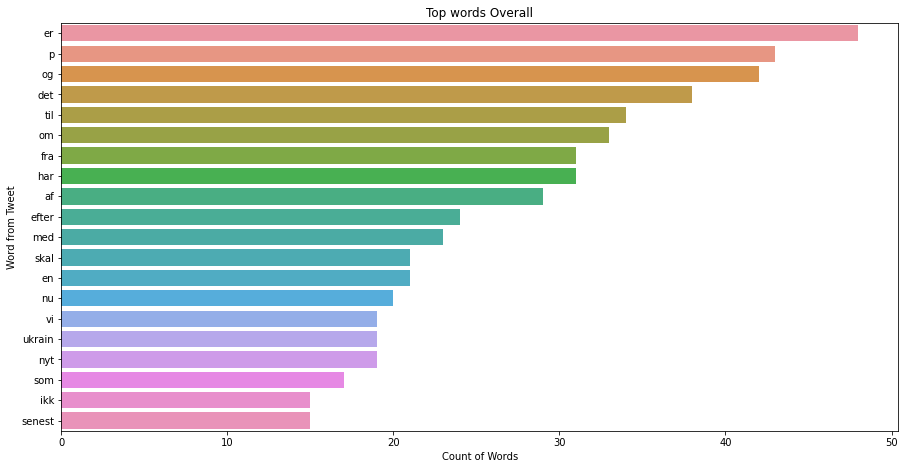

In [290]:
# Visualization
df2= df2[:20,]
plt.figure(figsize=(15,7.5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()

In [291]:
# Visualization for mentions organizations
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [292]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

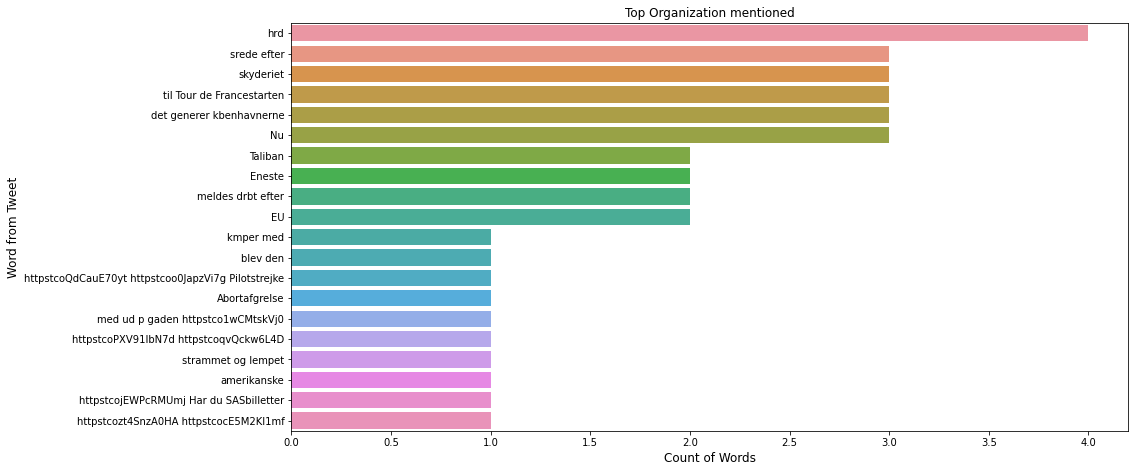

In [293]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organization mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [294]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

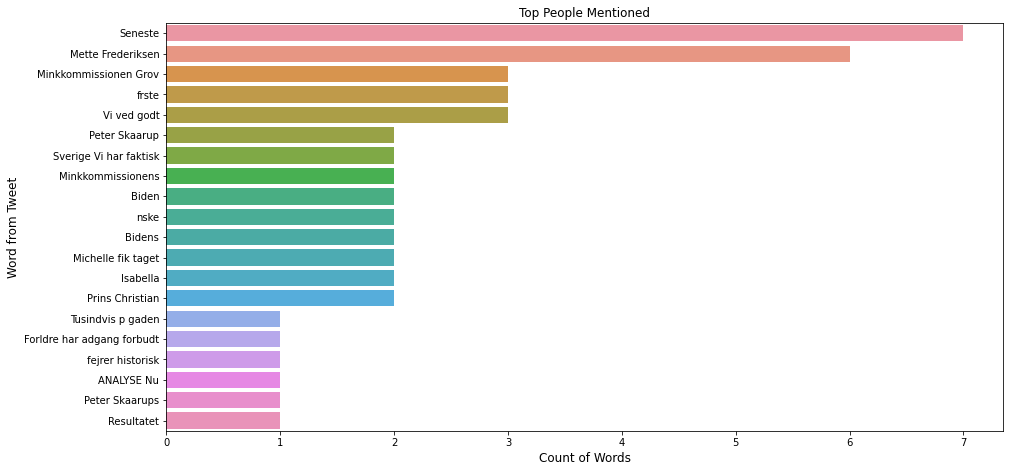

In [295]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()